This notebook is for the REGRESSION model of the final project paper

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression as LR, Ridge, RidgeCV as RCV
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.model_selection import train_test_split as tts

In [3]:
from sklearn.metrics import mean_squared_error as MSE, r2_score as r2s, mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score as cvs

In [4]:
# nrgdf for energy dataframe
nrgdf = pd.read_excel('ENB2012_data.xlsx')
print(nrgdf)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


X1 = Relative Compactness <br>
X2 = Surface area <br>
X3 = Wall Area <br>
X4 = Roof Area <br>
X5 = Overall Height <br>
X6 = Orientation <br>
X7 = Glazing Area <br>
X8 = Glazing Area Distribution <br> 
Y1 = Heating Load <br>
Y2 = Cooling Load

In [5]:
heat = nrgdf['Y1'].to_numpy()
cool = nrgdf['Y2'].to_numpy()
X = nrgdf.drop(['Y1','Y2'], axis = 1)
print(heat)
print(cool)
print(X)

[15.55  15.55  15.55  15.55  20.84  21.46  20.71  19.68  19.5   19.95
 19.34  18.31  17.05  17.41  16.95  15.98  28.52  29.9   29.63  28.75
 24.77  23.93  24.77  23.93   6.07   6.05   6.01   6.04   6.37   6.4
  6.366  6.4    6.85   6.79   6.77   6.81   7.18   7.1    7.1    7.1
 10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5   24.58  24.63
 24.63  24.59  29.03  29.87  29.14  28.09  26.28  26.91  26.37  25.27
 23.53  24.03  23.54  22.58  35.56  37.12  36.9   35.94  32.96  32.12
 32.94  32.21  10.36  10.43  10.36  10.39  10.71  10.8   10.7   10.75
 11.11  11.13  11.09  11.16  11.68  11.69  11.7   11.69  15.41  15.2
 15.42  15.21  12.96  12.97  12.93  13.02  24.29  24.31  24.13  24.25
 28.88  29.68  28.83  27.9   26.48  27.02  26.33  25.36  23.75  24.23
 23.67  22.79  35.65  37.26  36.97  36.03  33.16  32.4   33.12  32.41
 10.42  10.46  10.32  10.45  10.64  10.72  10.55  10.68  11.45  11.46
 11.32  11.49  11.45  11.42  11.33  11.43  15.41  15.18  15.34  15.19
 12.88  13.    12.97  1

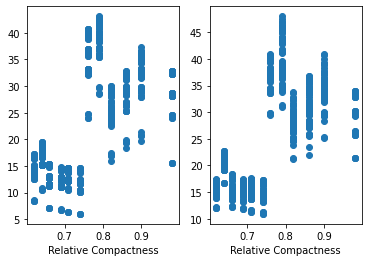

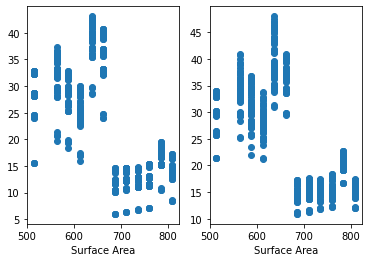

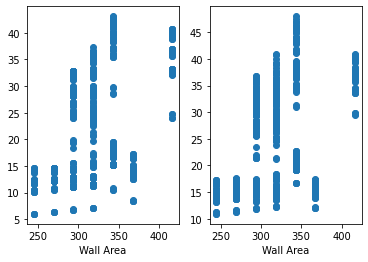

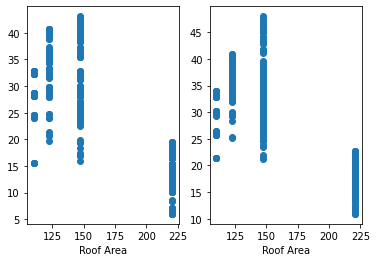

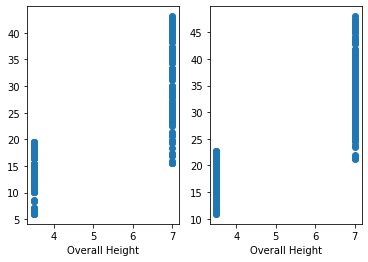

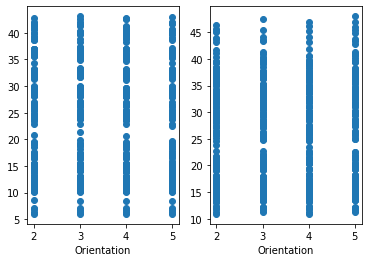

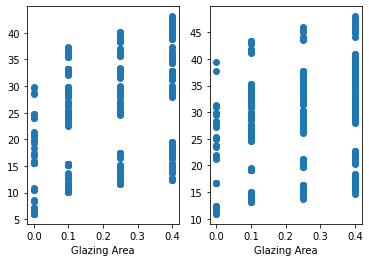

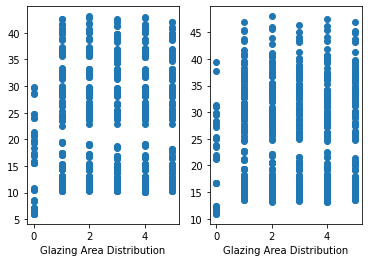

In [6]:
hl_rc = plt.subplot(1,2,1, xlabel = "Relative Compactness")
hl_rc = plt.scatter(X['X1'], heat)
cl_rc = plt.subplot(1,2,2, xlabel = "Relative Compactness")
cl_rc = plt.scatter(X['X1'], cool)
plt.show()
hl_rc = plt.subplot(1,2,1, xlabel = "Surface Area")
hl_rc = plt.scatter(X['X2'], heat)
cl_rc = plt.subplot(1,2,2, xlabel = "Surface Area")
cl_rc = plt.scatter(X['X2'], cool)
plt.show()
hl_rc = plt.subplot(1,2,1, xlabel = "Wall Area")
hl_rc = plt.scatter(X['X3'], heat)
cl_rc = plt.subplot(1,2,2, xlabel = "Wall Area")
cl_rc = plt.scatter(X['X3'], cool)
plt.show()
hl_rc = plt.subplot(1,2,1, xlabel = "Roof Area")
hl_rc = plt.scatter(X['X4'], heat)
cl_rc = plt.subplot(1,2,2, xlabel = "Roof Area")
cl_rc = plt.scatter(X['X4'], cool)
plt.show()
hl_rc = plt.subplot(1,2,1, xlabel = "Overall Height")
hl_rc = plt.scatter(X['X5'], heat)
cl_rc = plt.subplot(1,2,2, xlabel = "Overall Height")
cl_rc = plt.scatter(X['X5'], cool)
plt.show()
hl_rc = plt.subplot(1,2,1, xlabel = "Orientation")
hl_rc = plt.scatter(X['X6'], heat)
cl_rc = plt.subplot(1,2,2, xlabel = "Orientation")
cl_rc = plt.scatter(X['X6'], cool)
plt.show()
hl_rc = plt.subplot(1,2,1, xlabel = "Glazing Area")
hl_rc = plt.scatter(X['X7'], heat)
cl_rc = plt.subplot(1,2,2, xlabel = "Glazing Area")
cl_rc = plt.scatter(X['X7'], cool)
plt.show()
hl_rc = plt.subplot(1,2,1, xlabel = "Glazing Area Distribution")
hl_rc = plt.scatter(X['X8'], heat)
cl_rc = plt.subplot(1,2,2, xlabel = "Glazing Area Distribution")
cl_rc = plt.scatter(X['X8'], cool)
plt.show()

I will be keeping heating and cooling seperate models, but I will plot them together at every turn. I will have both have a train:test set ratio of 20:80, because looking at the overal data graphs involving the various columns and their relation to the heat or cooling loads shows low variance and so to avoid bias I lower the training set size and aim for a percentage of 80-90 correct. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()

In [8]:
# first the heat load (hl) train_test_split
hl_xtr, hl_xte, hl_ytr, hl_yte = tts(X.to_numpy(), heat, test_size = .80)
# now the cooling load (cl) train_test_split
cl_xtr, cl_xte, cl_ytr, cl_yte = tts(X.to_numpy(), cool, test_size = .80)

In [9]:
hl_xtr = scaler1.fit_transform(hl_xtr)
hl_xte = scaler1.transform(hl_xte)

cl_xtr = scaler2.fit_transform(cl_xtr)
cl_xte = scaler2.transform(cl_xte)

In [10]:
# creating and fitting the linear regressions
hl_lr = LR().fit(hl_xtr, hl_ytr)
cl_lr = LR().fit(cl_xtr, cl_ytr)

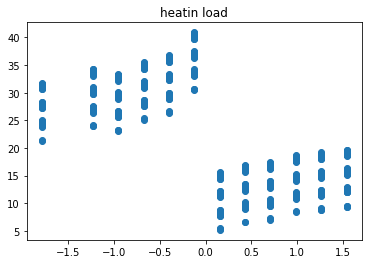

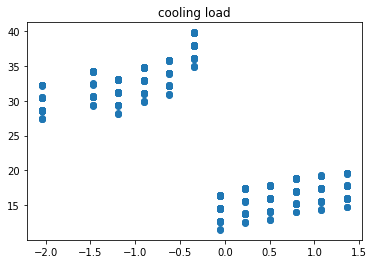

Heating Load Prediction Scoring: 0.91
Cooling Load Prediction Scoring: 0.89
Heating MSE: 2.94078
Heating MAE: 2.12236
Heating R2_score: 0.91481
Cooling MSE: 3.24760
Cooling MAE: 2.29925
Cooling R2_score: 0.88524


In [11]:
hl_pred = hl_lr.predict(hl_xte)
cl_pred = cl_lr.predict(cl_xte)
plt.title("heatin load")
plt.scatter(hl_xte[:,1], hl_pred)
plt.show()
plt.title("cooling load")
plt.scatter(cl_xte[:,1], cl_pred)
plt.show()
print("Heating Load Prediction Scoring: %0.2f" % hl_lr.score(hl_xte, hl_yte))
print("Cooling Load Prediction Scoring: %0.2f" % cl_lr.score(cl_xte, cl_yte))

print("Heating MSE: %0.5f" % MSE(hl_yte, hl_pred, squared = False))
print("Heating MAE: %0.5f" % MAE(hl_yte, hl_pred))
print("Heating R2_score: %0.5f" % r2s(hl_yte, hl_pred,))
print("Cooling MSE: %0.5f" % MSE(cl_yte, cl_pred, squared = False))
print("Cooling MAE: %0.5f" % MAE(cl_yte, cl_pred))
print("Cooling R2_score: %0.5f" % r2s(cl_yte, cl_pred))

In [12]:
# now time to create and fit using Ridge and RidgeCV modeling at default cv and alphas of 10^(-3) to 10^5 by 10^x
hl_ridge = Ridge(alpha = .01).fit(hl_xtr, hl_ytr)
hl_rcv = RCV(alphas = [0.001,0.01, 0.1, 1, 10, 100,1000,100000], cv = 3).fit(hl_xtr, hl_ytr)
cl_ridge = Ridge(alpha = 0.01).fit(cl_xtr, cl_ytr)
cl_rcv = RCV(alphas = [0.001,0.01, 0.1, 1, 10, 100,1000,100000], cv = 3).fit(cl_xtr, cl_ytr)

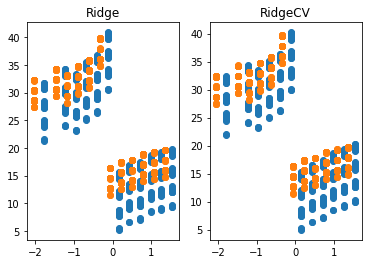

Heating Load Mean and Standard Deviation(normal): -2.398 (0.390)
Heating MAE(normal): 2.12120
Heating MSE(normal): 8.64593
Cooling Load Mean and Standard Deviation(normal): -2.316 (0.347)
Cooling MAE(normal): 2.29927
Cooling MSE(normal): 10.54834
Heating Load Mean and Standard Deviation(3-fold): -2.383 (0.371)
Heating MAE(3-fold): 2.10247
Heating MSE(3-fold): 8.67634
Cooling Load Mean and Standard Deviation(3-fold): -2.320 (0.328)
Cooling MAE(3-fold): 2.30031
Cooling MSE(3-fold): 10.56559
Heating Load Prediction Scoring(normal): 0.91
Cooling Load Prediction Scoring(normal): 0.89
Heating Load Prediction Scoring(3-fold): 0.91
Cooling Load Prediction Scoring(3-fold): 0.89
Heating R2_score: 0.91484
Cooling R2_score: 0.88522
Heating R2_score(3-fold): 0.91454
Cooling R2_score(3-fold): 0.88503


In [13]:
# predictions
hl_pred2 = hl_ridge.predict(hl_xte)
cl_pred2 = cl_ridge.predict(cl_xte)
hl_pred3 = hl_rcv.predict(hl_xte)
cl_pred3 = cl_rcv.predict(cl_xte)
#plotting
plt.subplot(1,2,1)
plt.title("Ridge")
plt.scatter(hl_xte[:,1], hl_pred2)
plt.scatter(cl_xte[:,1], cl_pred2)
plt.subplot(1,2,2)
plt.title("RidgeCV")
plt.scatter(hl_xte[:,1], hl_pred3)
plt.scatter(cl_xte[:,1], cl_pred3)
plt.show()
#scoring for normal Ridge scoring
hl_rid_scores = cvs(hl_ridge, hl_xtr, hl_ytr, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Heating Load Mean and Standard Deviation(normal): %.3f (%.3f)' % (np.mean(hl_rid_scores), np.std(hl_rid_scores)))
print("Heating MAE(normal): %0.5f" % MAE(hl_yte, hl_pred2))
print("Heating MSE(normal): %0.5f" % MSE(hl_yte, hl_pred2))
cl_rid_scores = cvs(cl_ridge, cl_xtr, cl_ytr, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Cooling Load Mean and Standard Deviation(normal): %.3f (%.3f)' % (np.mean(cl_rid_scores), np.std(cl_rid_scores)))
print("Cooling MAE(normal): %0.5f" % MAE(cl_yte, cl_pred2))
print("Cooling MSE(normal): %0.5f" % MSE(cl_yte, cl_pred2))
#scoring for RidgeCV scoring
hl_rcv_scores = cvs(hl_rcv, hl_xtr, hl_ytr, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Heating Load Mean and Standard Deviation(3-fold): %.3f (%.3f)' % (np.mean(hl_rcv_scores), np.std(hl_rcv_scores)))
print("Heating MAE(3-fold): %0.5f" % MAE(hl_yte, hl_pred3))
print("Heating MSE(3-fold): %0.5f" % MSE(hl_yte, hl_pred3))
cl_rcv_scores = cvs(cl_rcv, cl_xtr, cl_ytr, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Cooling Load Mean and Standard Deviation(3-fold): %.3f (%.3f)' % (np.mean(cl_rcv_scores), np.std(cl_rcv_scores)))
print("Cooling MAE(3-fold): %0.5f" % MAE(cl_yte, cl_pred3))
print("Cooling MSE(3-fold): %0.5f" % MSE(cl_yte, cl_pred3))
#score function scores
print("Heating Load Prediction Scoring(normal): %0.2f" % hl_ridge.score(hl_xte, hl_yte))
print("Cooling Load Prediction Scoring(normal): %0.2f" % cl_ridge.score(cl_xte, cl_yte))
print("Heating Load Prediction Scoring(3-fold): %0.2f" % hl_rcv.score(hl_xte, hl_yte))
print("Cooling Load Prediction Scoring(3-fold): %0.2f" % cl_rcv.score(cl_xte, cl_yte))
# r2 scoring
print("Heating R2_score: %0.5f" % r2s(hl_yte, hl_pred2))
print("Cooling R2_score: %0.5f" % r2s(cl_yte, cl_pred2))
print("Heating R2_score(3-fold): %0.5f" % r2s(hl_yte, hl_pred3))
print("Cooling R2_score(3-fold): %0.5f" % r2s(cl_yte, cl_pred3))

In [14]:
# Now the polynomial Regression
heat_poly = pf(degree = 2, include_bias= False)
hx_poly = heat_poly.fit_transform(hl_xtr)
cool_poly = pf(degree = 2, include_bias= False)
cx_poly = cool_poly.fit_transform(cl_xtr)
heat_poly2 = pf(degree = 3, include_bias= False)
hx_poly2 = heat_poly2.fit_transform(hl_xtr)
cool_poly2 = pf(degree = 3, include_bias= False)
cx_poly2 = cool_poly2.fit_transform(cl_xtr)

In [15]:
hl_lr2 = LR().fit(hx_poly, hl_ytr)
hl_lr3 = LR().fit(hx_poly2, hl_ytr)
cl_lr2 = LR().fit(cx_poly, cl_ytr)
cl_lr3 = LR().fit(cx_poly2, cl_ytr)

In [16]:
hl_new_poly = heat_poly.transform(hl_xte)
hl_new_poly2 = heat_poly2.transform(hl_xte)
cl_new_poly = cool_poly.transform(cl_xte)
cl_new_poly2 = cool_poly2.transform(cl_xte)

In [17]:
hl_poly_pred = hl_lr2.predict(hl_new_poly)
hl_poly_pred2 = hl_lr3.predict(hl_new_poly2)
cl_poly_pred = cl_lr2.predict(cl_new_poly)
cl_poly_pred2 = cl_lr3.predict(cl_new_poly2)

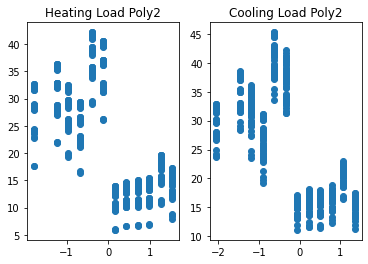

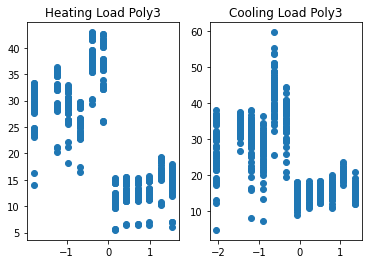

In [18]:
plt.subplot(1,2,1)
plt.title("Heating Load Poly2")
plt.scatter(hl_xte[:,1], hl_poly_pred)
plt.subplot(1,2,2)
plt.title("Cooling Load Poly2")
plt.scatter(cl_xte[:,1], cl_poly_pred)
plt.show()

plt.subplot(1,2,1)
plt.title("Heating Load Poly3")
plt.scatter(hl_xte[:,1], hl_poly_pred2)
plt.subplot(1,2,2)
plt.title("Cooling Load Poly3")
plt.scatter(cl_xte[:,1], cl_poly_pred2)
plt.show()

In [19]:
hl_poly_scores = cvs(hl_lr2, hl_xtr, hl_ytr, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Heating Load Mean and Standard Deviation(2-degree): %.3f (%.3f)' % (np.mean(hl_poly_scores), np.std(hl_poly_scores)))
print("Heating Load MSE(2-degree): %0.2f" % MSE(hl_yte, hl_poly_pred))
print("Heating Load MAE(2-degree): %0.2f" % MAE(hl_yte, hl_poly_pred))
hl_poly2_scores = cvs(hl_lr3, hl_xtr, hl_ytr, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Heating Load Mean and Standard Deviation(3-degree): %.3f (%.3f)' % (np.mean(hl_poly2_scores), np.std(hl_poly2_scores)))
print("Heating Load MSE(3-degree): %0.2f" % MSE(hl_yte, hl_poly_pred2))
print("Heating Load MAE(3-degree): %0.2f" % MAE(hl_yte, hl_poly_pred2))
cl_poly_scores = cvs(cl_lr2, cl_xtr, cl_ytr, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Cooling Load Mean and Standard Deviation(2-degree): %.3f (%.3f)' % (np.mean(cl_poly_scores), np.std(cl_poly_scores)))
print("Cooling Load MSE(2-degree): %0.2f" % MSE(cl_yte, cl_poly_pred))
print("Cooling Load MAE(2-degree): %0.2f" % MAE(cl_yte, cl_poly_pred))
cl_poly2_scores = cvs(cl_lr3, cl_xtr, cl_ytr, scoring='neg_mean_absolute_error', n_jobs=-1)
print('Cooling Load Mean and Standard Deviation(3-degree): %.3f (%.3f)' % (np.mean(cl_poly2_scores), np.std(cl_poly2_scores)))
print("Cooling Load MSE(3-degree): %0.2f" % MSE(cl_yte, cl_poly_pred2))
print("Cooling Load MAE(3-degree): %0.2f" % MAE(cl_yte, cl_poly_pred2))
# score functions
print("Heating Load Prediction Scoring(2-degree): %0.2f" % hl_lr2.score(hl_new_poly, hl_yte))
print("Cooling Load Prediction Scoring(2-degree): %0.2f" % cl_lr2.score(cl_new_poly, cl_yte))
print("Heating Load Prediction Scoring(3-degree): %0.2f" % hl_lr3.score(hl_new_poly2, hl_yte))
print("Cooling Load Prediction Scoring(3-degree): %0.2f" % cl_lr3.score(cl_new_poly2, cl_yte))
# r2 score
print("Heating R2_score(2-degree): %0.5f" % r2s(hl_yte, hl_poly_pred))
print("Cooling R2_score(2-degree): %0.5f" % r2s(cl_yte, cl_poly_pred))
print("Heating R2_score(3-degree): %0.5f" % r2s(hl_yte, hl_poly_pred2))
print("Cooling R2_score(3-degree): %0.5f" % r2s(cl_yte, cl_poly_pred2))

Heating Load Mean and Standard Deviation(2-degree): -2.399 (0.390)
Heating Load MSE(2-degree): 0.67
Heating Load MAE(2-degree): 0.63
Heating Load Mean and Standard Deviation(3-degree): -2.399 (0.390)
Heating Load MSE(3-degree): 0.61
Heating Load MAE(3-degree): 0.56
Cooling Load Mean and Standard Deviation(2-degree): -2.316 (0.348)
Cooling Load MSE(2-degree): 3.92
Cooling Load MAE(2-degree): 1.31
Cooling Load Mean and Standard Deviation(3-degree): -2.316 (0.348)
Cooling Load MSE(3-degree): 14.75
Cooling Load MAE(3-degree): 2.36
Heating Load Prediction Scoring(2-degree): 0.99
Cooling Load Prediction Scoring(2-degree): 0.96
Heating Load Prediction Scoring(3-degree): 0.99
Cooling Load Prediction Scoring(3-degree): 0.84
Heating R2_score(2-degree): 0.99338
Cooling R2_score(2-degree): 0.95738
Heating R2_score(3-degree): 0.99399
Cooling R2_score(3-degree): 0.83946


Despite the split of 20:80 for the train_test_split function, the low variance still made it difficult as we see with polynomial regression where the prediction score reaches 99% for 3-degree polynomial prediction. Regardless, however the best model of the three i've tried is Ridge Regression with the fact that its the lowest score wise, but still the better choice as the my goal was to stay in the 80-90% range which is best vs having 90-100% which may sound good but I would imagine shows a clear sign the model is over fitted, which truth be told is difficult with this low variance.

In [20]:
print("range of heating load: %0.4f - %0.4f" % (np.min(heat), np.max(heat)) ) 
print("range of cooling load: %0.4f - %0.4f" % (np.min(cool), np.max(cool)) ) 

range of heating load: 6.0100 - 43.1000
range of cooling load: 10.9000 - 48.0300
